In [9]:
import pandas as pd
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import initializers
import numpy as np
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)
D=pd.get_dummies(data,columns=["class"])
normD=(D-D.min())/(D.max()-D.min())
normD.head()

,sepal-length,sepal-width,petal-length,petal-width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,0.222222,0.625000,0.067797,0.041667,1.0,0.0,0.0
1,0.166667,0.416667,0.067797,0.041667,1.0,0.0,0.0
2,0.111111,0.500000,0.050847,0.041667,1.0,0.0,0.0
3,0.083333,0.458333,0.084746,0.041667,1.0,0.0,0.0
4,0.194444,0.666667,0.067797,0.041667,1.0,0.0,0.0


In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(normD, test_size=0.2)
Xtrain=train.loc[:,'sepal-length':'petal-width']
Ytrain=train.loc[:,'class_Iris-setosa':'class_Iris-virginica']
Xtest=test.loc[:,'sepal-length':'petal-width']
Ytest=test.loc[:,'class_Iris-setosa':'class_Iris-virginica']

Xtrain

,sepal-length,sepal-width,petal-length,petal-width
147,0.611111,0.416667,0.711864,0.791667
88,0.361111,0.416667,0.525424,0.500000
137,0.583333,0.458333,0.762712,0.708333
111,0.583333,0.291667,0.728814,0.750000
89,0.333333,0.208333,0.508475,0.500000
139,0.722222,0.458333,0.745763,0.833333
91,0.500000,0.416667,0.610169,0.541667
28,0.250000,0.583333,0.067797,0.041667
125,0.805556,0.500000,0.847458,0.708333
101,0.416667,0.291667,0.694915,0.750000


In [32]:

normal=initializers.RandomNormal()
uniform=initializers.RandomUniform()
he=initializers.he_normal(seed=None)

model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu', kernel_initializer=he))
model.add(Dense(8 , activation='sigmoid'))
model.add(Dense(3, kernel_initializer=he, activation='softmax'))

In [33]:

Adam=optimizers.Adam(lr=0.1)
Sgd=optimizers.SGD(lr=0.02, momentum=0.09,decay=0.01)
RMSprop=optimizers.RMSprop()
Adagrad=optimizers.Adagrad()



model.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])
history=model.fit(Xtrain, Ytrain,
                  epochs=100,
                  batch_size=3,
                  validation_data=(Xtest, Ytest))
scores = model.evaluate(Xtest, Ytest)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))


Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 1ms/step - loss: 0.7258 - accuracy: 0.6250 - val_loss: 0.3655 - val_accuracy: 0.7333
Epoch 2/100
120/120 [==============================] - 0s 427us/step - loss: 0.5083 - accuracy: 0.6750 - val_loss: 0.3259 - val_accuracy: 0.7667
Epoch 3/100
120/120 [==============================] - 0s 455us/step - loss: 0.3986 - accuracy: 0.7500 - val_loss: 0.2050 - val_accuracy: 0.9000
Epoch 4/100
120/120 [==============================] - 0s 384us/step - loss: 0.2449 - accuracy: 0.9083 - val_loss: 0.2480 - val_accuracy: 0.8667
Epoch 5/100
120/120 [==============================] - 0s 393us/step - loss: 0.1321 - accuracy: 0.9667 - val_loss: 0.2855 - val_accuracy: 0.8667
Epoch 6/100
120/120 [==============================] - 0s 416us/step - loss: 0.1364 - accuracy: 0.9417 - val_loss: 0.0536 - val_accuracy: 0.9667
Epoch 7/100
120/120 [==============================] - 0s 389us/step - loss: 0.2516 - a

Epoch 57/100
120/120 [==============================] - 0s 476us/step - loss: 0.1820 - accuracy: 0.9583 - val_loss: 0.0464 - val_accuracy: 0.9667
Epoch 58/100
120/120 [==============================] - 0s 468us/step - loss: 0.1046 - accuracy: 0.9750 - val_loss: 0.0725 - val_accuracy: 0.9333
Epoch 59/100
120/120 [==============================] - 0s 478us/step - loss: 0.0491 - accuracy: 0.9833 - val_loss: 0.4522 - val_accuracy: 0.8667
Epoch 60/100
120/120 [==============================] - 0s 370us/step - loss: 0.0889 - accuracy: 0.9750 - val_loss: 0.4491 - val_accuracy: 0.8667
Epoch 61/100
120/120 [==============================] - 0s 388us/step - loss: 0.0751 - accuracy: 0.9583 - val_loss: 0.0488 - val_accuracy: 0.9667
Epoch 62/100
120/120 [==============================] - 0s 436us/step - loss: 0.0858 - accuracy: 0.9750 - val_loss: 0.1191 - val_accuracy: 0.9333
Epoch 63/100
120/120 [==============================] - 0s 383us/step - loss: 0.1118 - accuracy: 0.9667 - val_loss: 0.0476 -

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


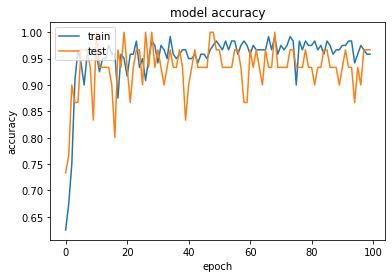

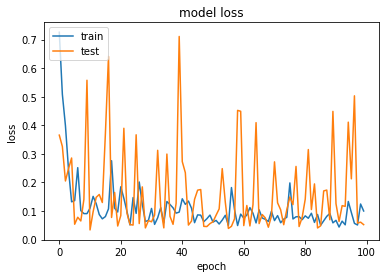

In [34]:
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
yval = model.predict_classes(Xtest)
print(yval)
print(Xtest)
print(Ytest)



[2 0 2 0 0 1 0 0 0 2 0 1 1 0 2 1 0 2 0 0 2 1 1 1 1 2 0 0 1 0]
     sepal-length  sepal-width  petal-length  petal-width
115      0.583333     0.500000      0.728814     0.916667
44       0.222222     0.750000      0.152542     0.125000
112      0.694444     0.416667      0.762712     0.833333
10       0.305556     0.708333      0.084746     0.041667
30       0.138889     0.458333      0.101695     0.041667
60       0.194444     0.000000      0.423729     0.375000
42       0.027778     0.500000      0.050847     0.041667
23       0.222222     0.541667      0.118644     0.166667
20       0.305556     0.583333      0.118644     0.041667
136      0.555556     0.583333      0.779661     0.958333
7        0.194444     0.583333      0.084746     0.041667
65       0.666667     0.458333      0.576271     0.541667
63       0.500000     0.375000      0.627119     0.541667
13       0.000000     0.416667      0.016949     0.000000
124      0.666667     0.541667      0.796610     0.833333
126      0